In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
irisDF=pd.DataFrame(iris.data,columns=iris.feature_names)
irisDF['target']=iris.target
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


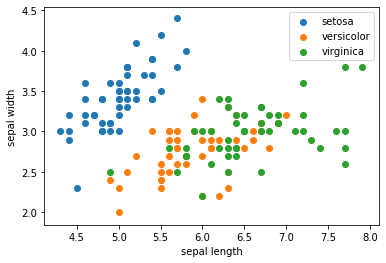

In [21]:
markers=['^','s','o']
for i,marker in enumerate(markers):
    x_axis_data=irisDF[irisDF['target']==i]['sepal length (cm)']
    y_axis_data=irisDF[irisDF['target']==i]['sepal width (cm)']
    plt.scatter(x_axis_data,y_axis_data,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris_scaled=StandardScaler().fit_transform(irisDF)

In [16]:
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [17]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(5)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


No handles with labels found to put in legend.


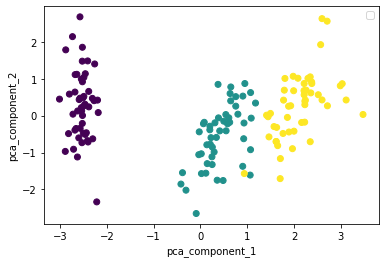

In [34]:
plt.scatter(irisDF_pca.iloc[:,0],irisDF_pca.iloc[:,1],c=irisDF_pca['target'])
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.legend()

In [36]:
pca.explained_variance_ratio_

array([0.76740358, 0.18282727])

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print(scores)

[0.98 0.94 0.96]


In [41]:

pca_X=irisDF_pca.drop('target',axis=1,inplace=False)
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print(scores_pca)

[0.98 0.98 1.  ]


In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

In [44]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


No handles with labels found to put in legend.


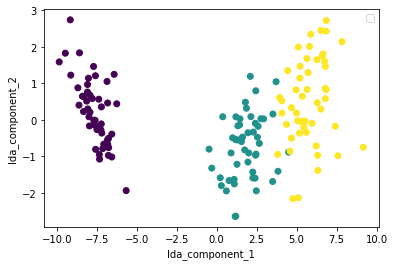

In [48]:
plt.scatter(iris_lda[:,0],iris_lda[:,1],c=iris.target)
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.legend()

In [50]:
from numpy.linalg import svd
import numpy as np
np.random.seed(121)
a=np.random.randn(4,4)
print(a)

[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [51]:
U,Sigma,Vt=svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print(U)
print(Sigma)
print(Vt)

(4, 4) (4,) (4, 4)
[[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]
[3.4229581  2.02287339 0.46263157 0.07935069]
[[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]


In [53]:
Sigma_mat=np.diag(Sigma)
a=np.dot(np.dot(U,Sigma_mat),Vt)
print(a)

[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [54]:
a[2]=a[0]+a[1]
a[3]=a[0]
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

In [56]:
U,Sigma,Vt=svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print(U)
print(np.round(Sigma,3))
print(Vt)

(4, 4) (4,) (4, 4)
[[ 0.24568427  0.58278576  0.74974581  0.19463098]
 [-0.77441642 -0.01670951  0.1048459   0.62370453]
 [-0.52873215  0.56607625 -0.1048459  -0.62370453]
 [ 0.24568427  0.58278576 -0.64489991  0.42907354]]
[2.663 0.807 0.    0.   ]
[[ 0.16449395 -0.57517122 -0.78233269 -0.17342252]
 [-0.67967123  0.19439734 -0.13178782 -0.69490191]
 [ 0.70577632  0.19755523  0.1502427  -0.66353511]
 [-0.11343957 -0.76964906  0.58992767 -0.21623397]]


In [59]:
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
Vt_=Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape)
a_=np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a,10))

(4, 2) (2, 2) (2, 4)
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.54214372  0.8987654   1.04147472 -0.0732477 ]
 [-0.21203317 -0.28492917 -0.57389821 -0.44031017]]


In [63]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix=np.random.random((6,6))
print(matrix)
U,Sigma,Vt=svd(matrix,full_matrices=False)
print(U.shape)
print(Sigma.shape)
print(Vt.shape)
print(Sigma)

[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
(6, 6)
(6,)
(6, 6)
[3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [65]:
n_components=4
U_tr,Sigma_tr,Vt_tr=svds(matrix,k=n_components)
print(U_tr.shape)
print(Sigma_tr.shape)
print(Vt_tr.shape)
print(Sigma_tr)

(6, 4)
(4,)
(4, 6)
[0.55463089 0.83865238 0.88116505 3.2535007 ]


In [68]:
matrix_tr=np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)
print(matrix_tr)
print(matrix)

[[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]
[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
